# Libraries & Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from cdt.data import AcyclicGraphGenerator

import cdt
import networkx as nx

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [40]:
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
dataset_dir = "datasets"

breast_cancer_df = pd.read_csv(f"{dataset_dir}/breast_cancer.csv")
thyroid_df = pd.read_csv(f"{dataset_dir}/thyroid.csv")

## Breast cancer dataset preprocessing

In [3]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Convert column "diagnosis" from categorical to binary
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "M", 'diagnosis'] = 1
breast_cancer_df.loc[breast_cancer_df['diagnosis'] == "B", 'diagnosis'] = 0

# Drop colum "Unnamed: 32" (contains only nan values)
breast_cancer_df.drop(columns=["Unnamed: 32", 'id'], inplace=True)
target_bc = breast_cancer_df.pop('diagnosis').to_numpy().astype(int)

In [5]:
scaler = StandardScaler()
breast_cancer_df = pd.DataFrame(scaler.fit_transform(breast_cancer_df.to_numpy()), columns=breast_cancer_df.columns)

In [6]:
breast_cancer_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## Thyroid dataset preprocessing

In [7]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [8]:
# Binarize textual data
thyroid_df.replace({'F': 0., 'f': 0., 'M': 1., 't': 1., "P": 1., "N": 0.}, inplace=True)

# Categorical encoding for "referreal source" column
thyroid_df.replace({'SVHC': 0, 'SVI': 1, 'STMW': 2, 'SVHD': 3, 'other': -1}, inplace=True)

# "?" values have to removed. They cannot be mapped to np.nan because the algorithm won't work. I decided to map those values to 0, but we should discuss this choice
thyroid_df.replace({'?': 0.}, inplace=True)

In [9]:
# There are no measurements for TBG, can be dropped
thyroid_df.drop(columns=["TBG", "TBG measured"], inplace=True)

target_t = thyroid_df.pop('binaryClass').to_numpy().astype(int)

In [10]:
scaler = StandardScaler()
thyroid_df = pd.DataFrame(scaler.fit_transform(thyroid_df.to_numpy()), columns=thyroid_df.columns)

In [11]:
thyroid_df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source
0,-0.533513,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-0.140943,0.506041,0.817848,0.255413,0.539971,0.338124,0.697672,0.337150,0.213911,0.216665
1,-1.429156,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-0.020960,0.506041,0.361965,0.255413,0.007277,-2.957494,-2.521241,-2.966042,-2.163908,-0.772753
2,-0.284723,1.517556,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-0.154655,-1.976125,-1.461567,0.255413,0.169402,0.338124,0.048242,0.337150,0.453874,-0.772753
3,0.909468,-0.658954,2.670077,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-0.189793,0.506041,0.270789,0.255413,1.698002,-2.957494,-2.521241,-2.966042,-2.163908,-0.772753
4,0.909468,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-0.165796,0.506041,-0.367448,0.255413,-0.942308,0.338124,-0.064702,0.337150,-0.636868,1.206082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,-1.080850,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-0.196649,-1.976125,-1.461567,-3.915227,-2.355105,-2.957494,-2.521241,-2.966042,-2.163908,-0.772753
3768,0.809952,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-0.153798,0.506041,0.453142,0.255413,0.516811,0.338124,0.528256,0.337150,0.322985,1.206082
3769,1.108500,-0.658954,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,0.021890,0.506041,0.179612,0.255413,0.238883,0.338124,0.500020,0.337150,0.126652,-0.772753
3770,1.008984,1.517556,-0.374521,-0.115904,-0.107384,-0.201375,-0.119378,-0.119378,-0.126056,-0.257175,...,-0.166653,0.506041,0.361965,0.255413,-0.455935,0.338124,0.132951,0.337150,-0.266016,1.206082


# Independence graphs

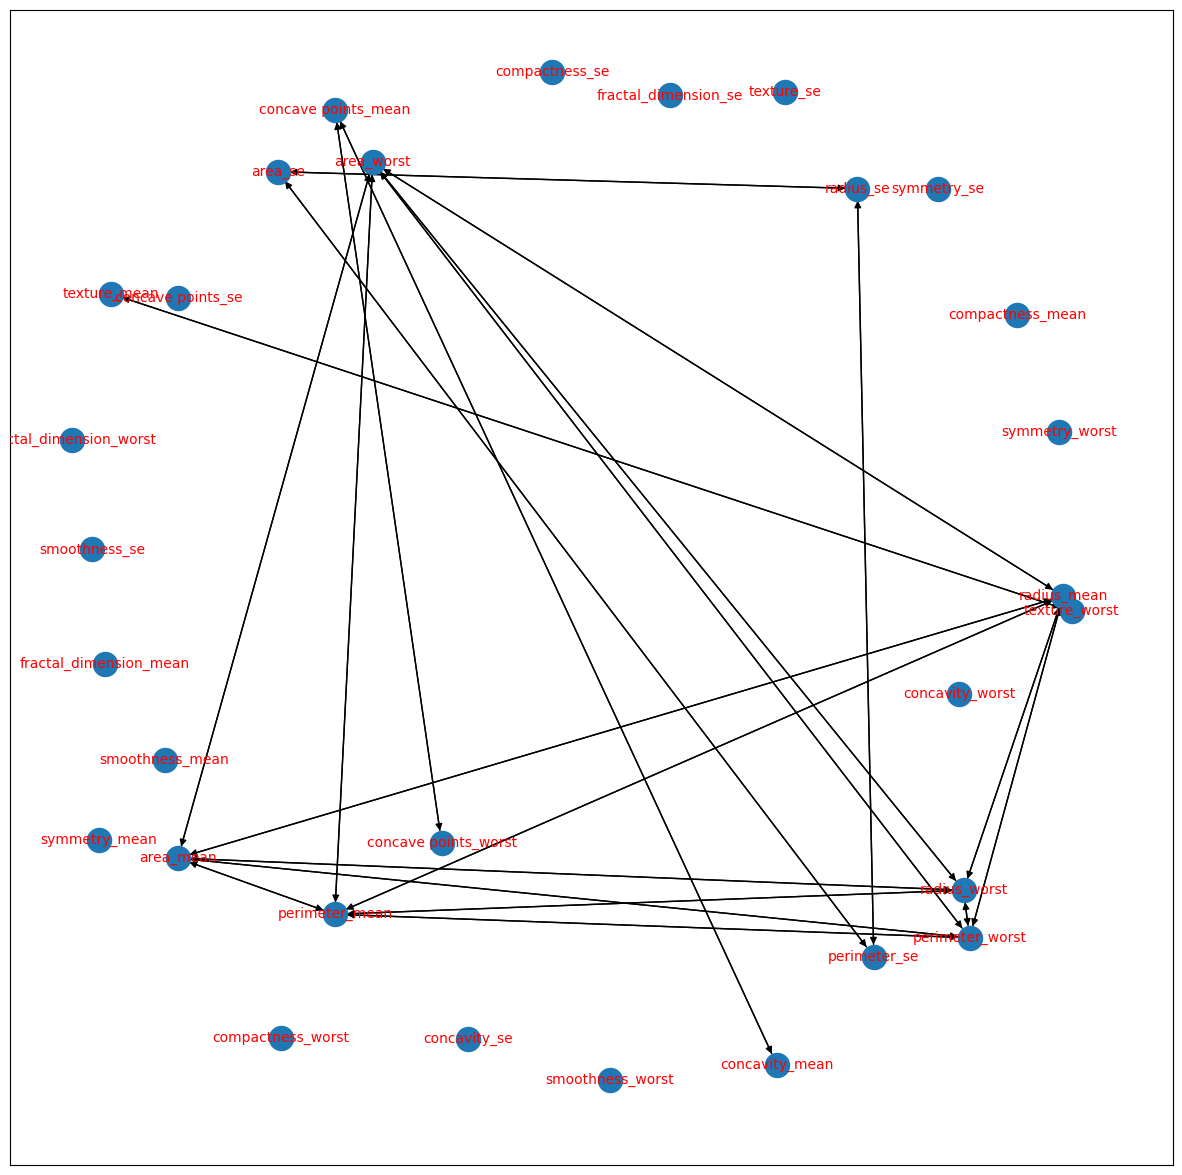

In [23]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_bc = glasso.predict(breast_cancer_df, 0.9)
skeleton_bc.remove_edges_from(nx.selfloop_edges(skeleton_bc))

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_bc, font_size=10, font_color='r')

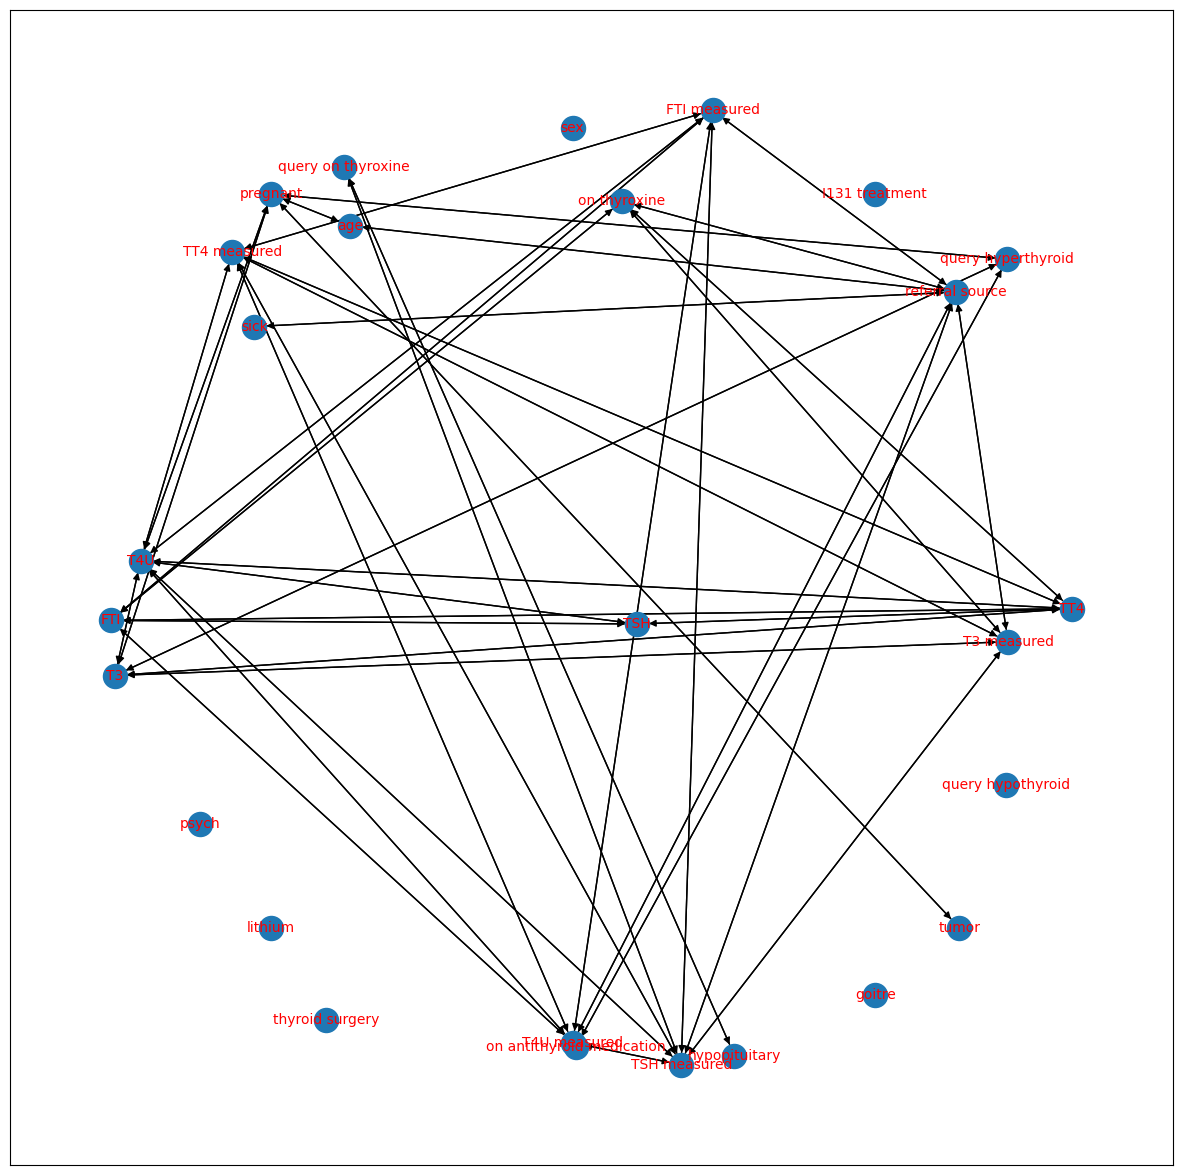

In [27]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton_t = glasso.predict(thyroid_df, 0.1)
skeleton_t.remove_edges_from(nx.selfloop_edges(skeleton_t))

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(skeleton_t, font_size=10, font_color='r')

# PC

## Constrained

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


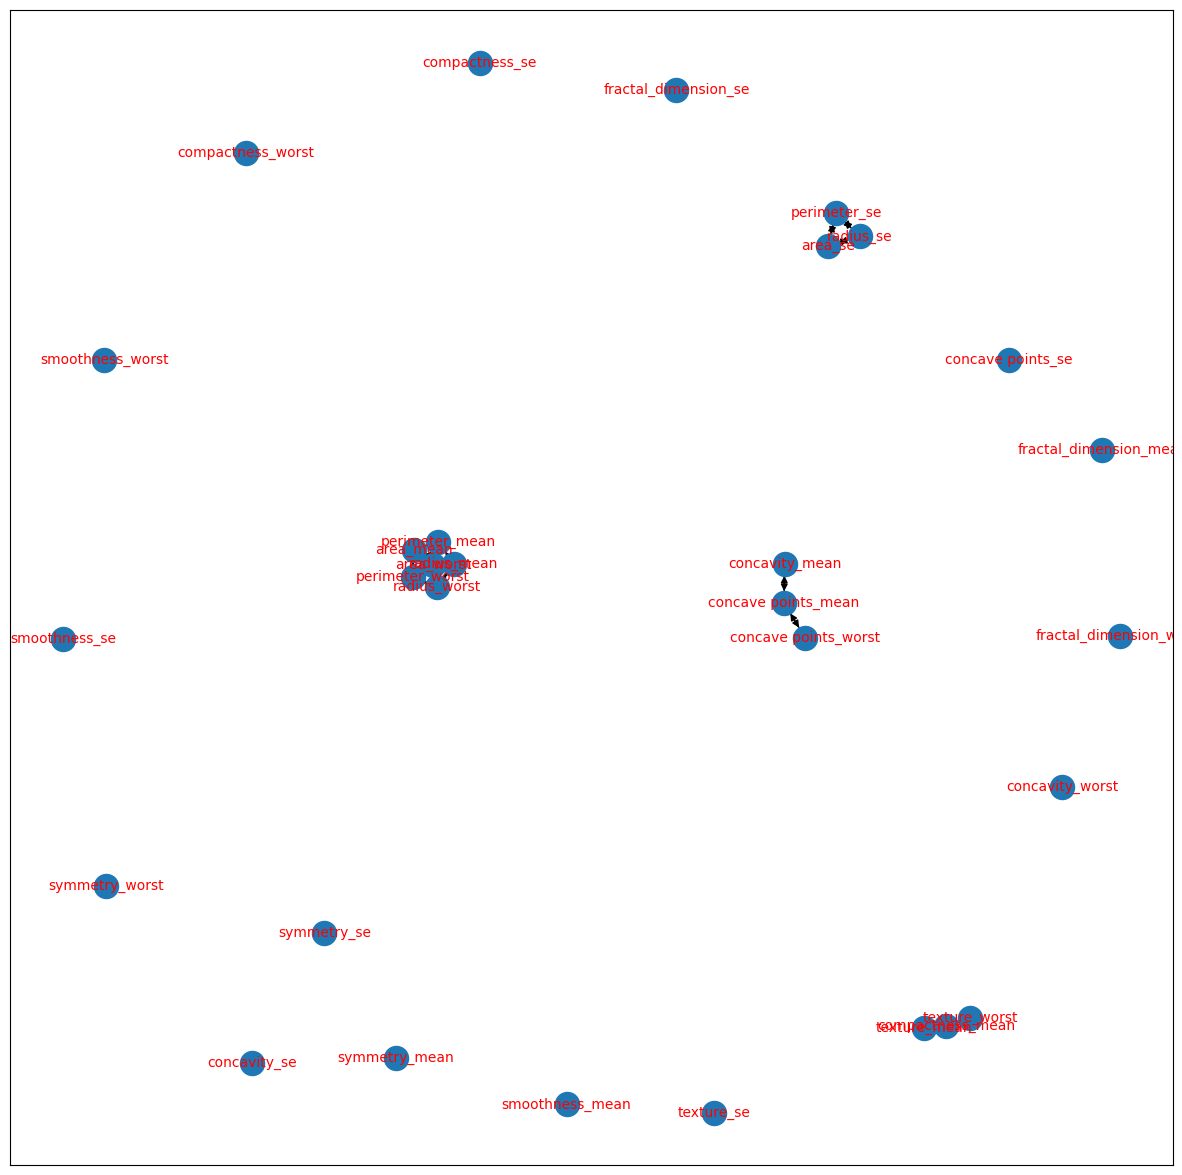

In [28]:
model_pc = cdt.causality.graph.PC()
graph_pc_c = model_pc.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_c, font_size=10, font_color='r')

PC is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


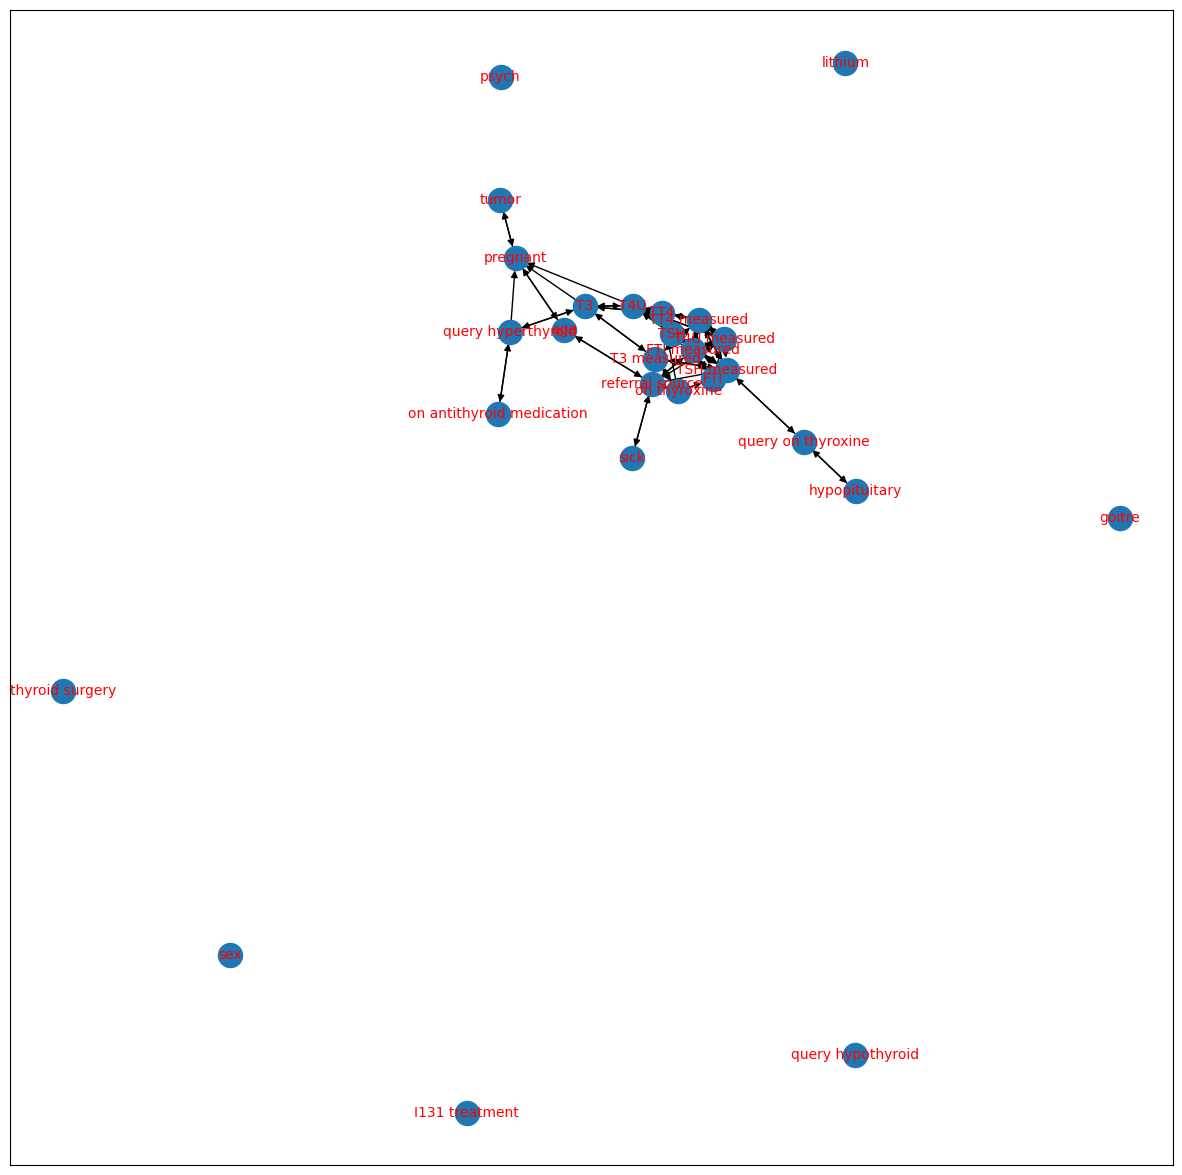

In [29]:
model_pc = cdt.causality.graph.PC()
graph_pc_c = model_pc.predict(thyroid_df, skeleton_t)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_c, font_size=10, font_color='r')

## Unconstrained

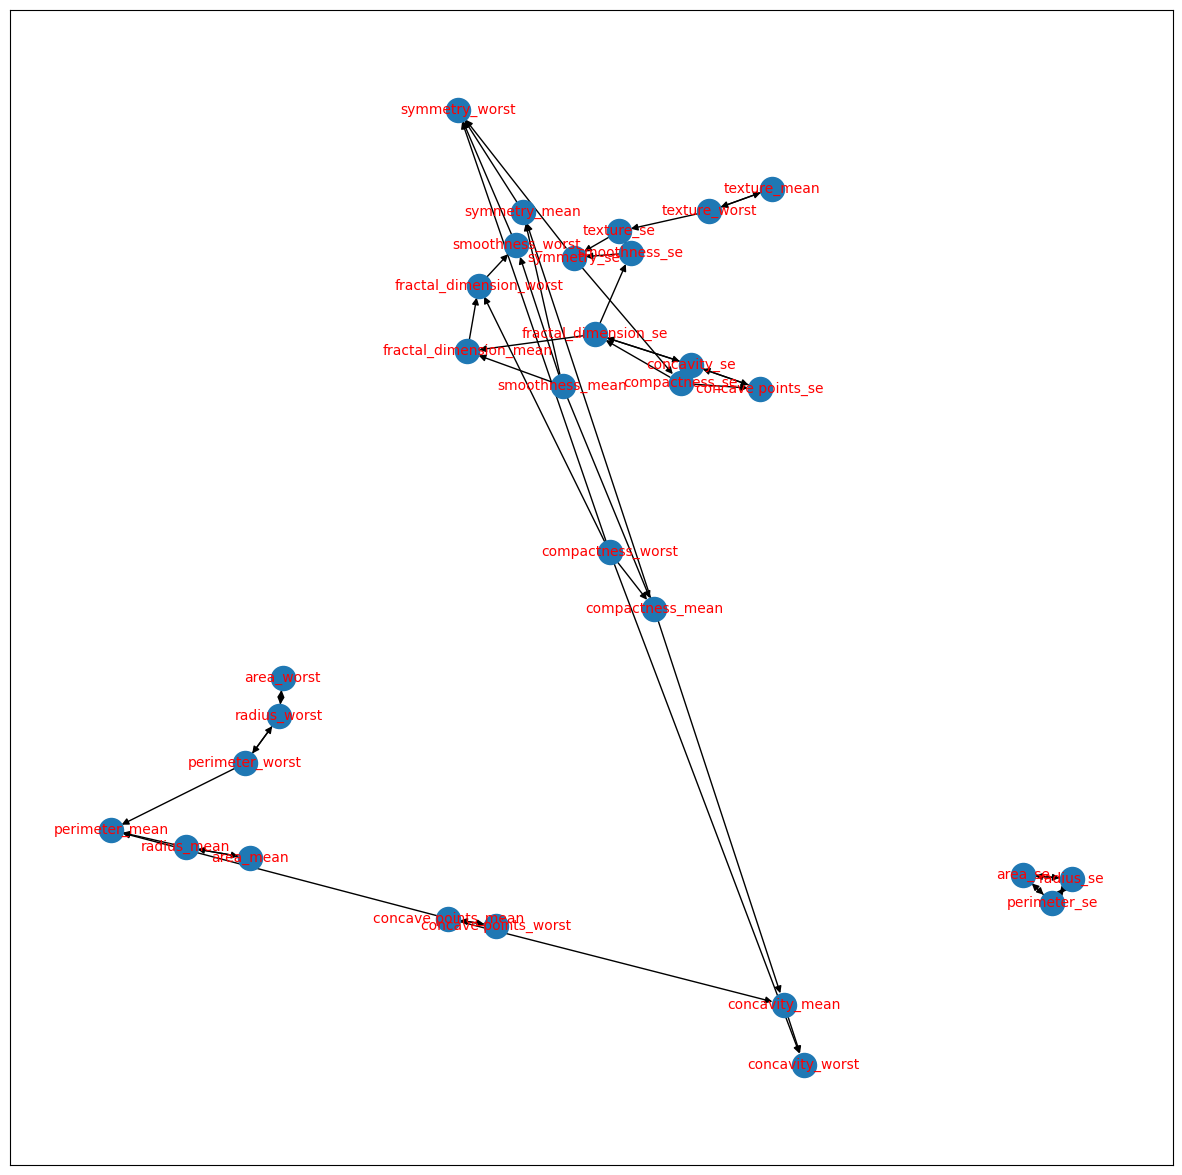

In [31]:
model_pc = cdt.causality.graph.PC()
graph_pc_u = model_pc.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_u, font_size=10, font_color='r')

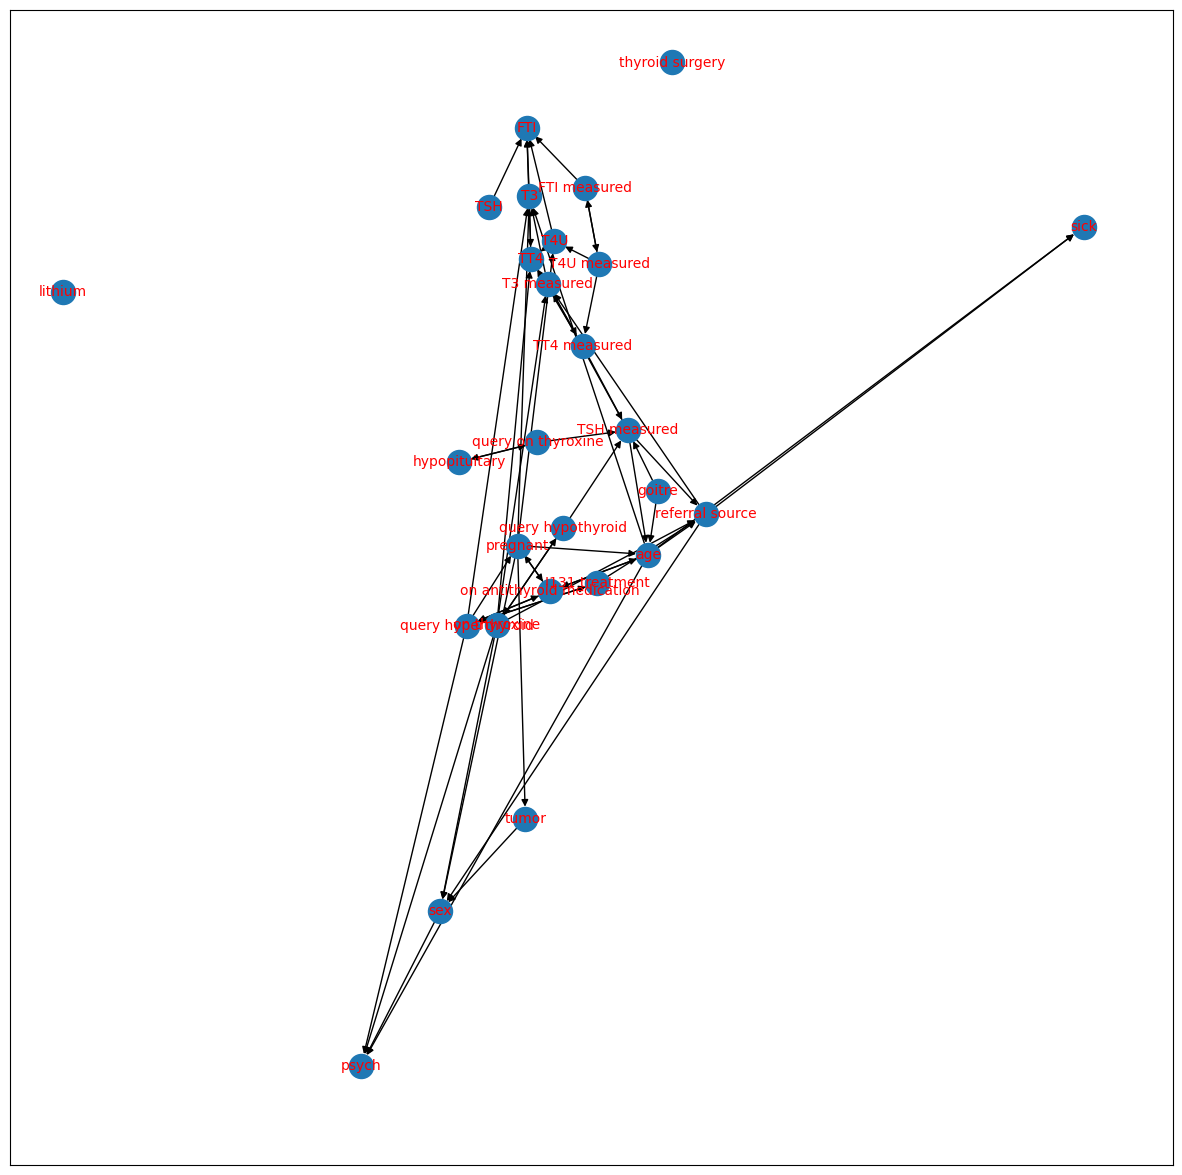

In [32]:
model_pc = cdt.causality.graph.PC()
graph_pc_u = model_pc.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_pc_u, font_size=10, font_color='r')

# GES

# Constrained

GES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


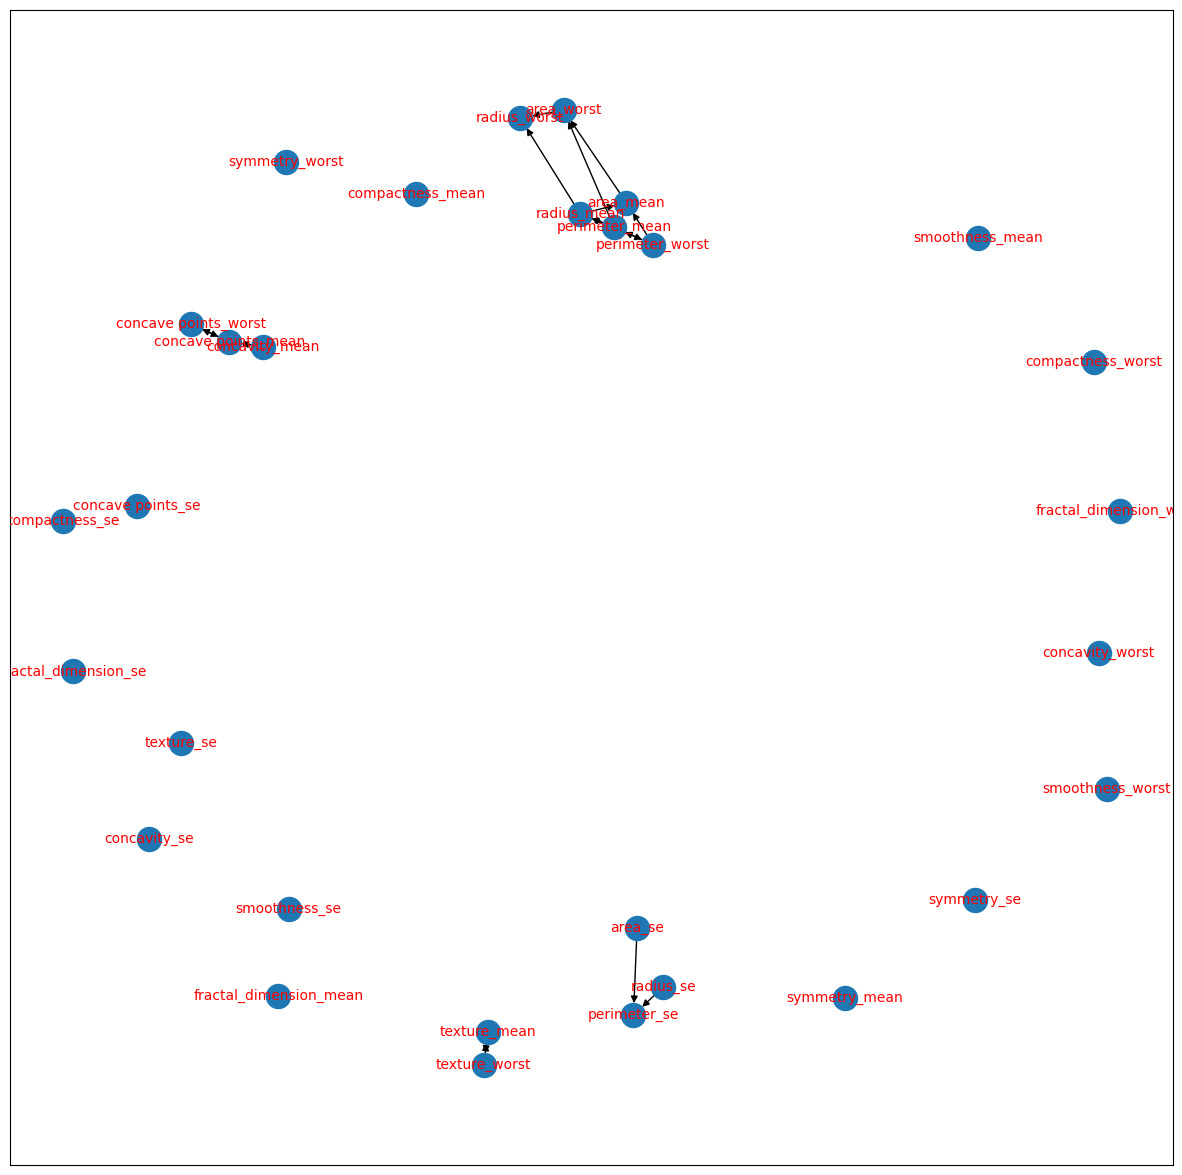

In [36]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_c = model_ges.predict(breast_cancer_df, skeleton_bc)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_c, font_size=10, font_color='r')

GES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


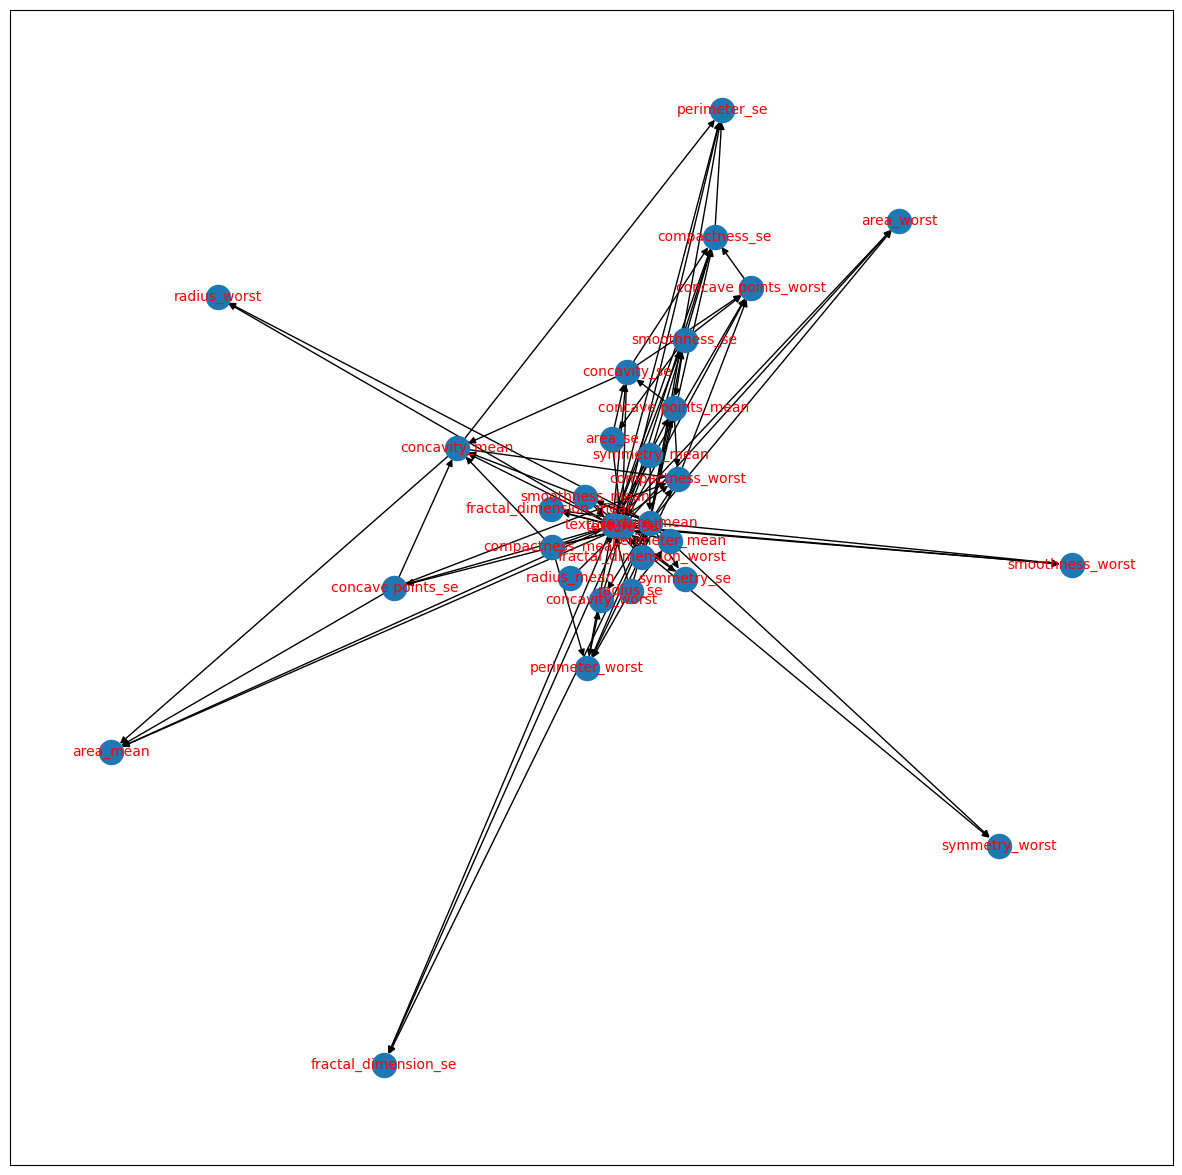

In [37]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_c = model_ges.predict(breast_cancer_df, skeleton_t)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_c, font_size=10, font_color='r')

## Unconstrained

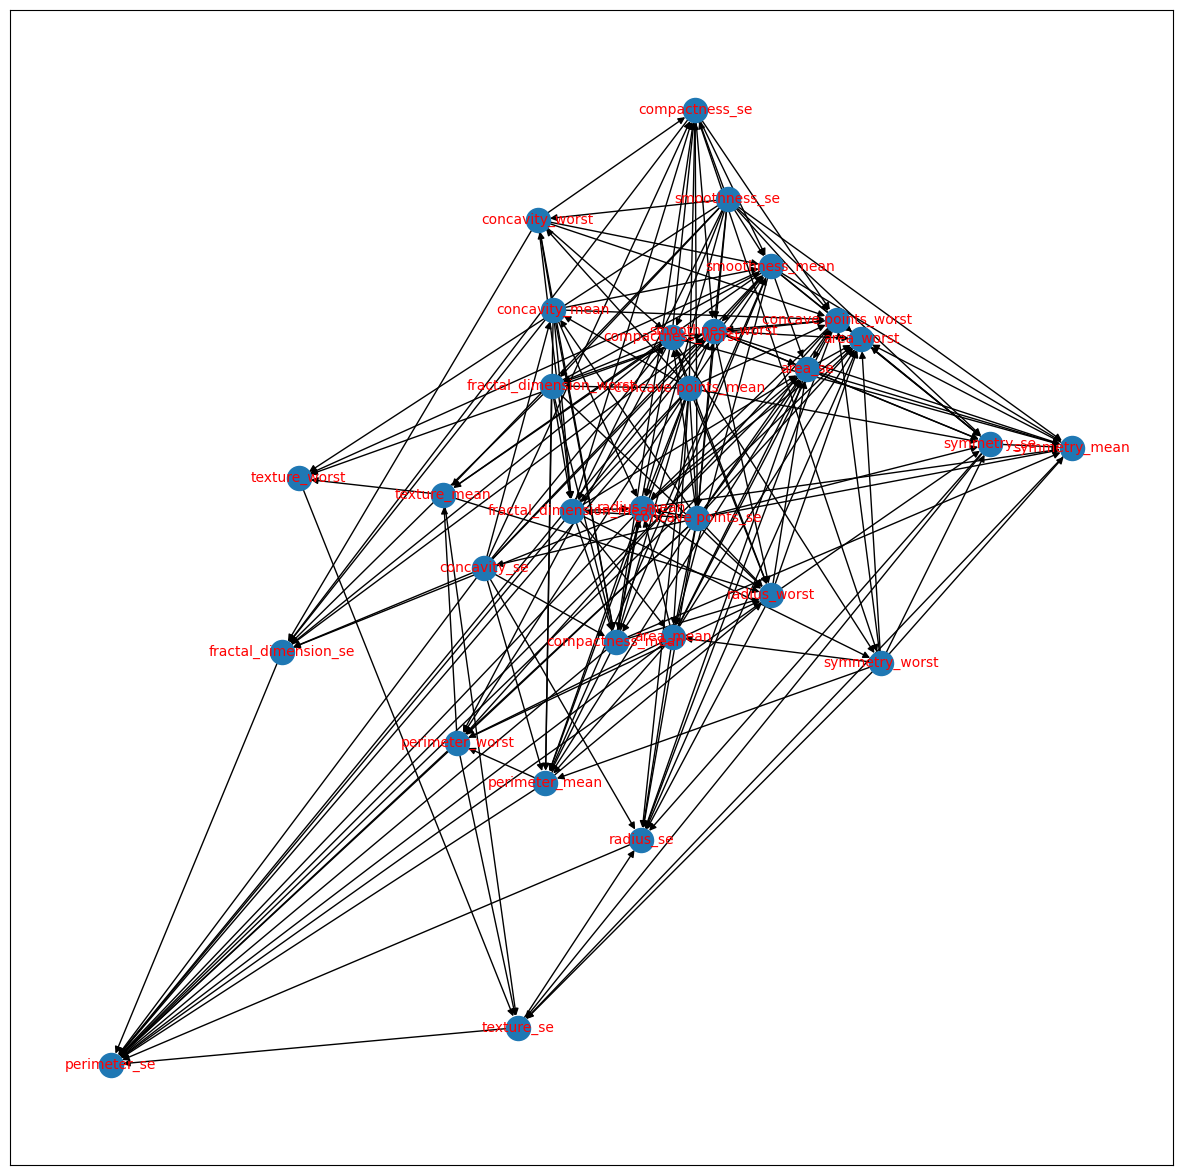

In [33]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_u = model_ges.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_u, font_size=10, font_color='r')

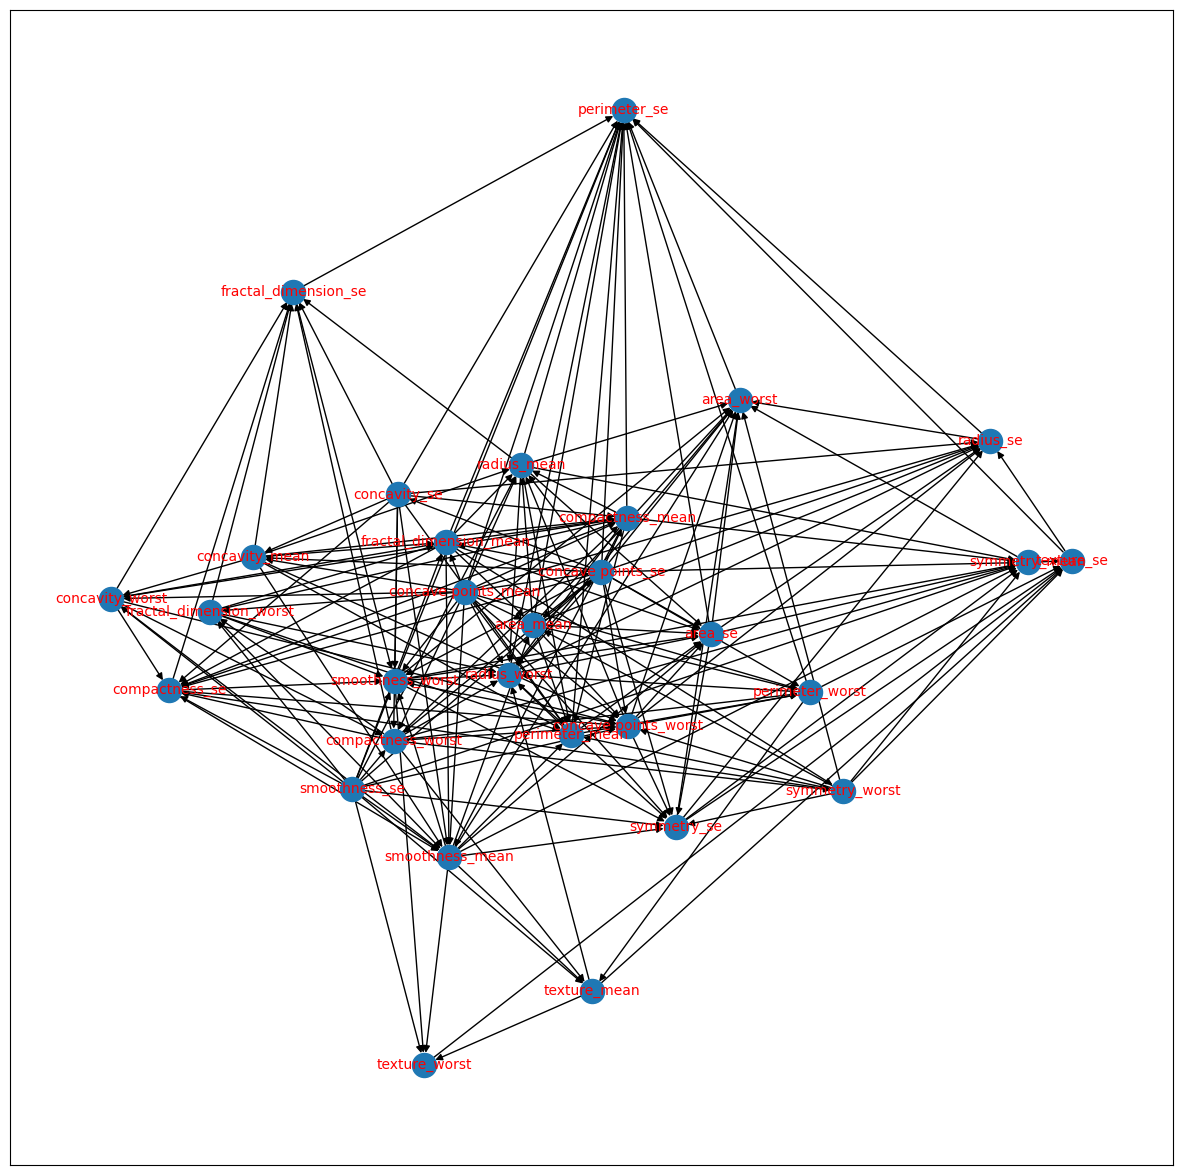

In [35]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
graph_ges_u = model_ges.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_ges_u, font_size=10, font_color='r')

# LiNGAM

## Unconstrained (LiNGAM cannot be perfomed constrained)

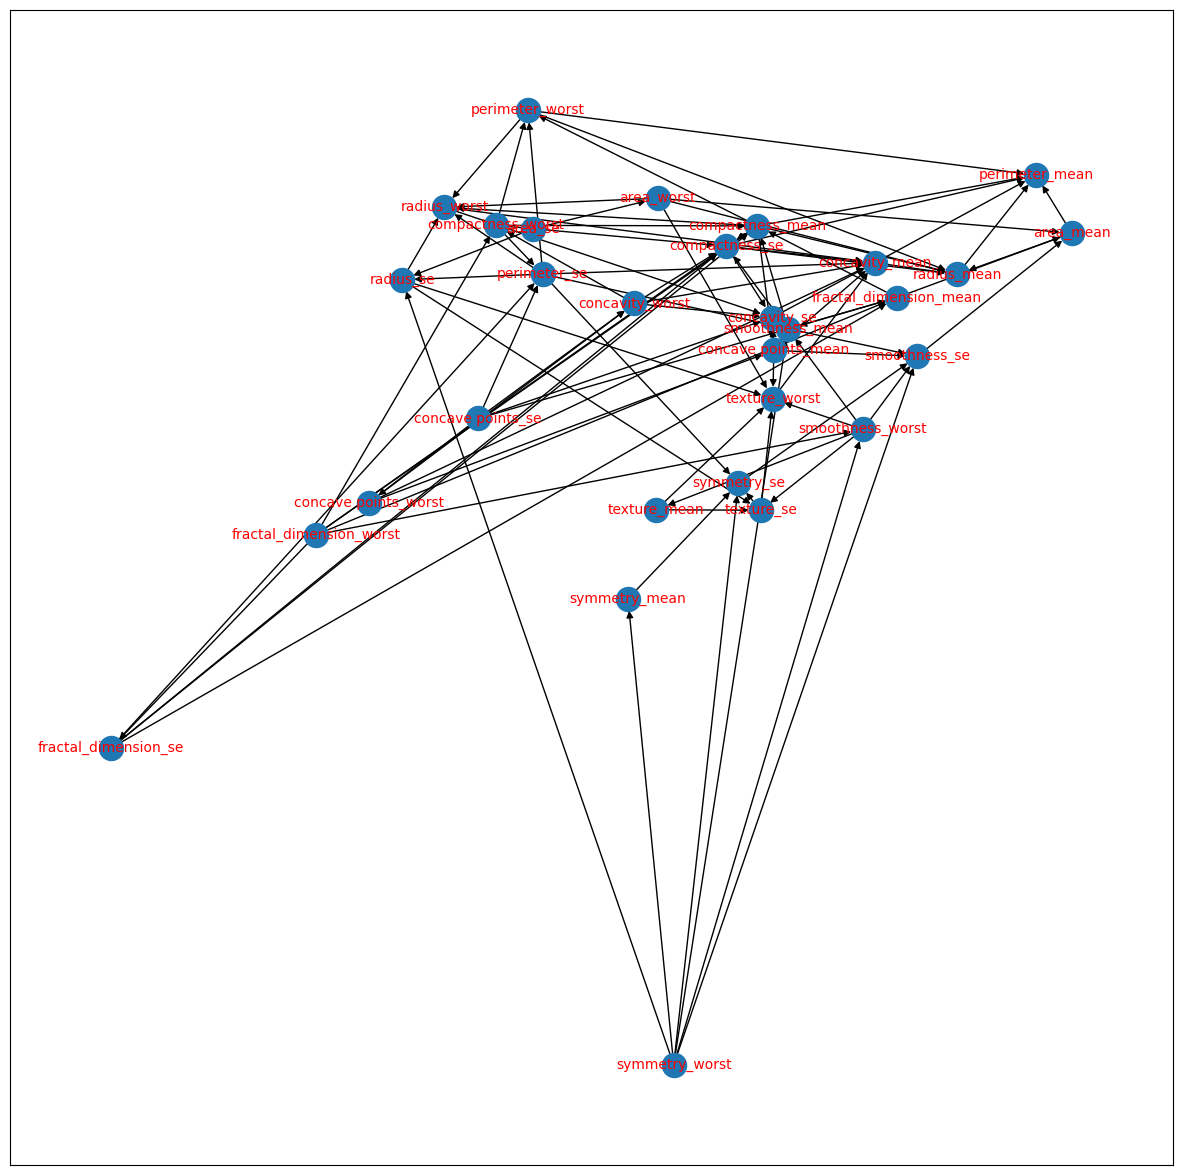

In [39]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(breast_cancer_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')

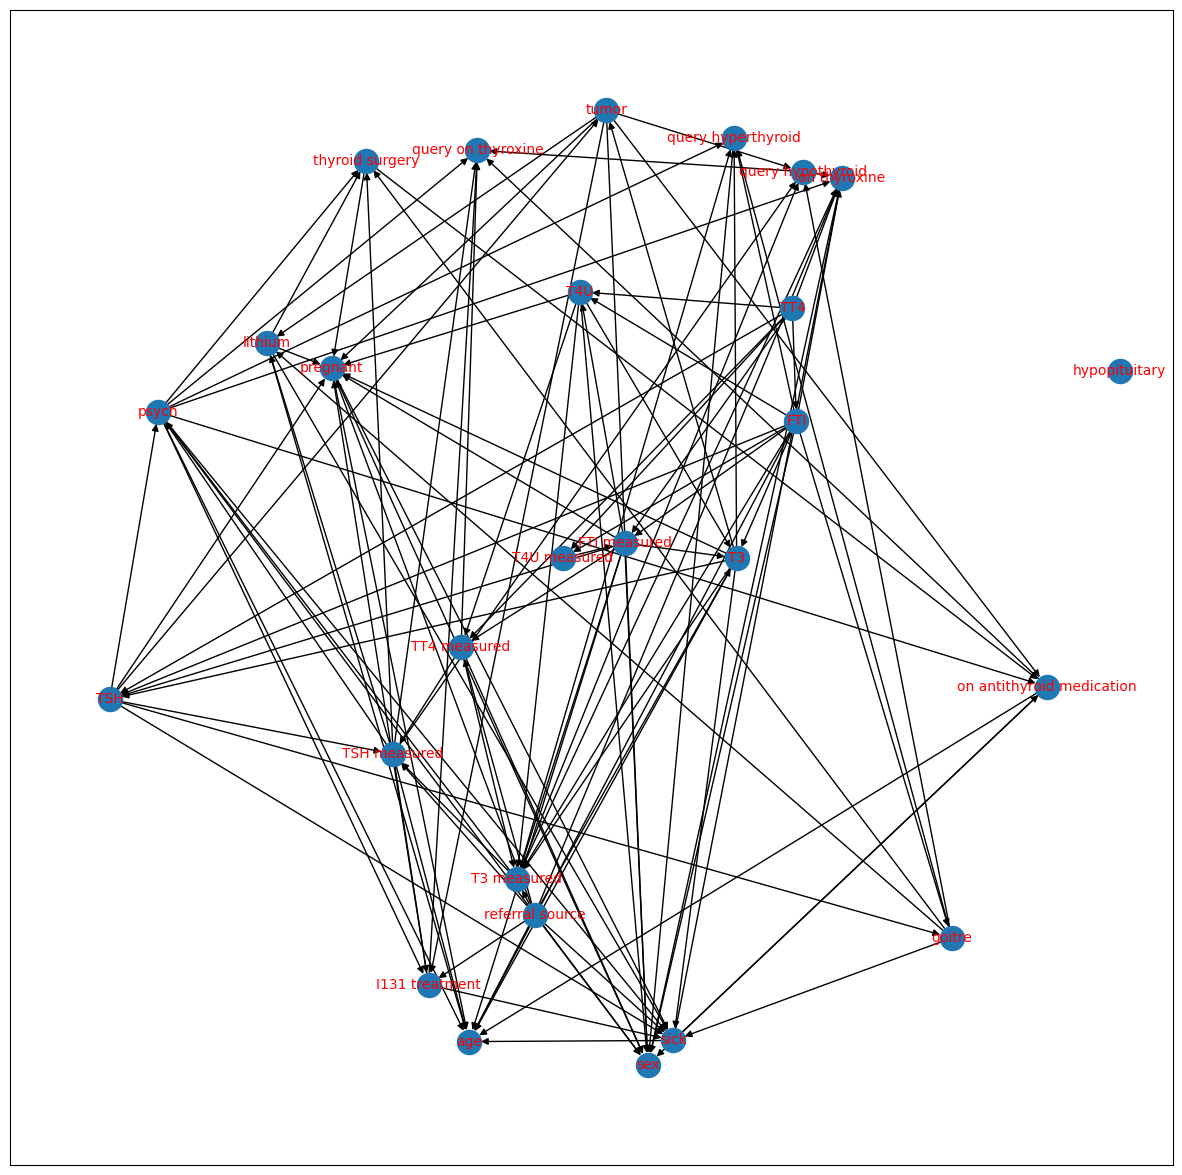

In [40]:
# LiNGAM Algorithm
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(thyroid_df)

# visualize network
fig=plt.figure(figsize=(15,15))
nx.draw_networkx(graph_lingam, font_size=10, font_color='r')

# Synthetic data

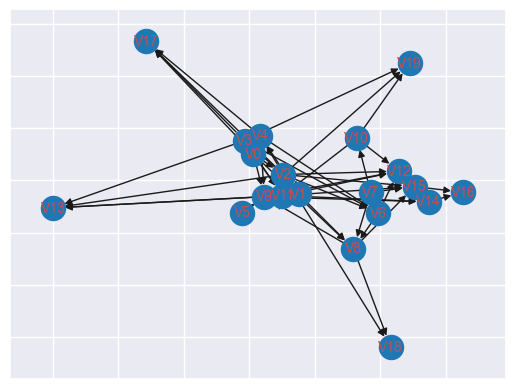

In [44]:
generator = AcyclicGraphGenerator('linear', npoints=1000)
data, graph = generator.generate()
generator.to_csv('generated_graph')

nx.draw_networkx(graph, font_size=10, font_color='r')

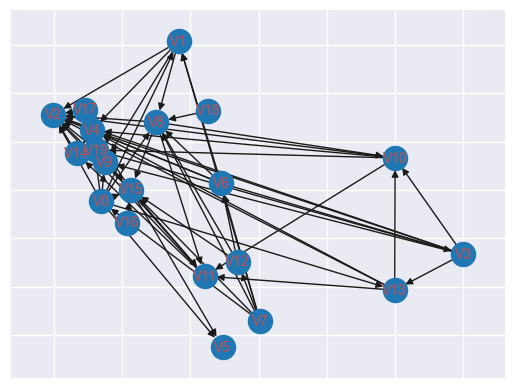

In [45]:
model_lingam = cdt.causality.graph.LiNGAM()
predict = model_lingam.predict(data)

nx.draw_networkx(predict, font_size=10, font_color='r')

In [46]:
cdt.metrics.SHD(graph, predict)

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


73

In [56]:
auc, roc = cdt.metrics.precision_recall(graph, predict)

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


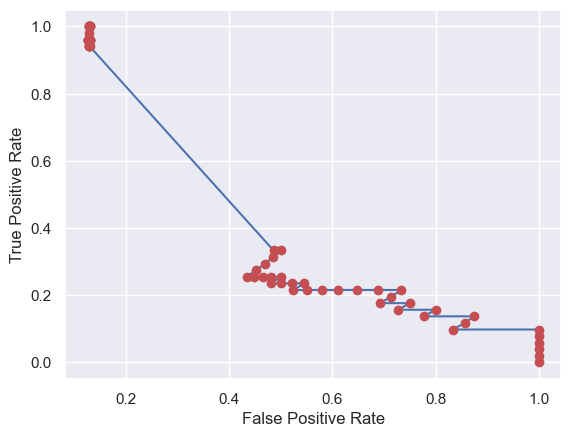

In [59]:
fpr = [x[0] for x in roc]
tpr = [x[1] for x in roc]

plt.plot(fpr,tpr)
plt.plot(fpr,tpr,'or')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()